In [1]:
import json

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import Ellipse
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['svg.fonttype'] = 'none'
plt.style.use('seaborn-ticks')  # 'seaborn-ticks'
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage

In [2]:
# colors and class-superclass maps
with open(r'..\data\metadata\color_schemes.json') as infile:
    colors = json.load(infile, parse_int=True)
    

data = pd.read_excel(r'../data/processed/combined_metabolites_data.xlsx').set_index('i')
data_cols = data.filter(regex='_FBG|_RBG').columns
fbg_cols = data.filter(regex='_FBG').columns
rbg_cols = data.filter(regex='_RBG').columns

ap = pd.read_excel(r'..\data\metadata\animal_phenotypes.xlsx', index_col=0)
fg = pd.read_csv(r'..\data\metadata\combined_metab_lipid_file_grouping.csv', index_col=0)

## PCA code originally in `BJA-3.5.1.1` 

In [4]:
scaled = StandardScaler().fit_transform(data[data_cols].T)
pca_object = PCA(n_components=10).fit(scaled)
pca = pca_object.transform(scaled)
pc_columns = [f'pc{x}' for x in range(1, pca_object.n_components+1)]
pca = pd.DataFrame(pca, index=data_cols, columns=pc_columns)
pca = pca.join(fg[['animal', 'bg_type', 'week']])
pca['animal'] = pca['animal'].astype('str')
pca
loadings = pd.DataFrame(pca_object.components_.T * np.sqrt(pca_object.explained_variance_), 
                        index=data.index, columns=pc_columns)
loadings['pc1_rank'] = loadings['pc1'].abs().rank(ascending=False)
loadings['pc2_rank'] = loadings['pc2'].abs().rank(ascending=False)
loadings = loadings.join(data['ID'])
loadings.loc[loadings['ID'] != 'unknown'].sort_values('pc2_rank').iloc[:20]

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc1_rank,pc2_rank,ID
i,,,,,,,,,,,,,
l_771,0.082035,-0.981225,0.032584,0.109102,-0.049818,-0.007271,-0.060364,-0.016752,0.023705,0.025523,1226.0,1.0,TG 56:5
l_624,-0.121843,-0.976805,-0.008024,0.022715,-0.037068,-0.048286,-0.021335,-0.067779,-0.057083,-0.003173,1160.0,3.0,TG 56:8
l_639,0.016415,-0.975722,0.023704,0.003643,-0.102903,-0.022677,-0.013780,-0.085367,-0.018175,0.025023,1332.0,5.0,TG 58:9
l_661,0.086431,-0.975505,-0.018449,0.086764,-0.036795,-0.028877,-0.033438,-0.059311,-0.080366,-0.000472,1220.0,7.0,TG 56:7
l_612,-0.177645,-0.973744,-0.023923,0.073179,-0.011381,-0.072157,0.008710,-0.072372,-0.057446,-0.007537,1053.0,8.0,TG 55:8
l_658,-0.075452,-0.973111,0.046106,0.018234,-0.118617,-0.025486,-0.014858,-0.046983,-0.064631,0.021547,1236.0,9.0,TG 18:0_20:5_20:4
l_716,-0.003955,-0.968741,-0.041261,0.061921,0.070762,-0.055483,-0.092687,0.043191,0.024920,0.002809,1357.0,11.0,TG 54:5
l_687,0.122236,-0.963858,-0.022193,0.150409,0.110816,-0.040312,-0.002195,-0.068097,0.047168,0.025495,1159.0,13.0,TG 52:4
l_600,-0.148522,-0.962710,0.046977,0.030046,-0.114106,-0.006997,-0.034888,-0.088918,-0.053209,0.029080,1107.0,14.0,TG 18:2_18:2_22:6


In [5]:
# Draw confidence intervals around data: 
# From https://stackoverflow.com/a/25022642
def make_ci(x, y, std=2, **kwargs):
    cov = np.cov(x, y)
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    vals = vals[order]
    vecs = vecs[:, order]
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
    w, h = 2 * std * np.sqrt(vals)
    ellipse = Ellipse(xy=(np.mean(x), np.mean(y)), width=w, height=h, angle=theta, 
                      **kwargs)
    return ellipse

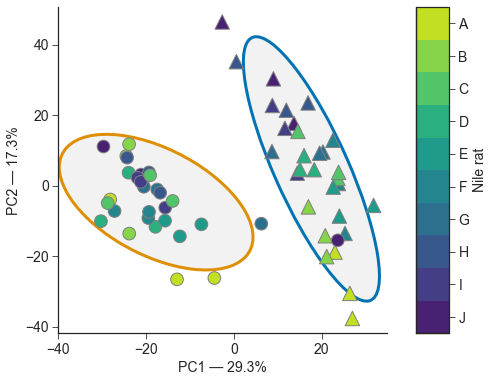

In [7]:
fig, ax = plt.subplots(figsize=(7,6))
sns.scatterplot(
    data=pca, x='pc1', y='pc2', hue='animal', palette=colors,
    style='bg_type', markers={'RBG': '^', 'FBG': 'o'}, 
    size='bg_type', sizes={'RBG': 210, 'FBG':160},
    legend=False, alpha=1, linewidth=1, edgecolor='gray',
    ax=ax)
ax.set_xlabel(f'PC1 — {round(100*pca_object.explained_variance_ratio_[0], 1)}%', fontsize=14) 
ax.set_ylabel(f'PC2 — {round(100*pca_object.explained_variance_ratio_[1], 1)}%', fontsize=14) 
ax.tick_params(labelsize=14)
ax.set_xlim(-40, ax.get_xlim()[1])
# plt.legend(loc=(1.4, 0), fontsize=14, markerscale=2)

# Discrete colorbar 
# https://stackoverflow.com/a/48269806  code source
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='10%', pad=0.4)
cmap = ListedColormap(sns.color_palette('viridis', 10))
norm = BoundaryNorm(np.arange(0, 10 + 1) - 0.5, 10)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cb = plt.colorbar(sm, cax=cax, shrink=0.2)
# cax.set_xlabel('data label') 
cb.ax.set_yticks(range(10), labels=[_ for _ in 'JIHGFEDCBA'], fontsize=14)
cb.ax.set_ylabel('Nile rat', fontsize=14)

for bg_type in ['FBG', 'RBG']:
    df = pca.loc[pca['bg_type'] == bg_type]
    ci_ellipse = make_ci(x=df['pc1'], y=df['pc2'], 
                         edgecolor=colors[bg_type], 
                         facecolor=(0.95, 0.95, 0.95),
                         linewidth=3, alpha=1, zorder=0, 
                         label=('Fed' if bg_type=='RBG' else 'Fasted'))
    ax.add_patch(ci_ellipse)
pca_ax = ax
sns.despine()

# Clustermap of all data
## Original heatmap code from `BJA-4.3.2-RvsF`
## Better code from `BJA-4.5.5-FigTGs-heatmap`

In [9]:
cm_data = data.loc[:, fg.index].T
# cm_data = cm_data.groupby(['animal', 'bg_type']).mean()
# cm_data = cm_data.reset_index()

# Normalize the data to the average of the lipid or metabolite across all fasted samples 
fbg_means = data.loc[:, fbg_cols].mean(axis=1)
cm_data = cm_data.subtract(fbg_means)
cm_data = cm_data.join(fg[['animal', 'bg_type']])
# Sort into correct order and add metadata for column colors 
# file_order = fg.sort_values(['bg_type', 'ogtt', 'week'], ascending=[True, True, True])
cm_data = cm_data.join(ap['OGTT (AUC)'], on='animal')
cm_data = cm_data.sort_values(['bg_type', 'OGTT (AUC)'])
cm_data['animal_color'] = cm_data['animal'].astype('str').map(colors)
cm_data

,m_0,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_9,m_10,...,l_867,l_868,l_869,l_870,l_871,l_872,animal,bg_type,OGTT (AUC),animal_color
combined_col_name,,,,,,,,,,,,,,,,,,,,,
1091_8_FBG,0.238399,0.002571,0.891893,0.371912,3.144489,0.088486,0.035941,-0.256733,0.073236,0.353464,...,-1.568027,-0.710072,-1.864972,-0.639582,-0.685412,-0.521302,1091,FBG,19060.0,"[0.283072, 0.130895, 0.449241]"
1091_9_FBG,-0.038210,1.600206,-0.263899,0.429072,3.413428,1.494378,1.197328,1.767548,1.362814,1.457743,...,1.606351,0.464681,1.355214,0.126344,0.038838,-0.275253,1091,FBG,19060.0,"[0.283072, 0.130895, 0.449241]"
1091_10_FBG,-0.885422,-0.201320,0.294113,0.197481,2.789409,0.155941,0.155938,0.188853,0.073782,-0.167922,...,-0.252171,-0.223808,-0.204927,0.420468,0.220019,0.636626,1091,FBG,19060.0,"[0.283072, 0.130895, 0.449241]"
1093_8_FBG,-2.034620,0.125131,0.259371,0.131454,3.031694,0.161679,0.083738,0.211733,0.048941,0.398208,...,0.954661,0.225860,2.002863,1.602694,1.627976,1.921959,1093,FBG,25057.5,"[0.262138, 0.242286, 0.520837]"
1093_9_FBG,-0.200072,0.100451,-0.920178,0.010957,2.677643,0.201864,0.008949,0.542142,0.012250,0.335393,...,2.087874,1.284124,2.640129,1.816525,1.653919,1.826483,1093,FBG,25057.5,"[0.262138, 0.242286, 0.520837]"
1093_10_FBG,-0.431931,-0.361805,-0.584554,-0.111033,2.382439,0.083900,0.243498,0.346250,0.306790,-0.063877,...,0.319059,-0.103490,0.479363,0.403576,0.437443,0.497207,1093,FBG,25057.5,"[0.262138, 0.242286, 0.520837]"
1092_8_FBG,-1.883794,-0.277367,0.192726,0.183171,1.091578,-0.257738,-0.500350,0.498313,-0.603723,0.024000,...,-0.449420,-0.747410,0.112716,0.279280,0.574604,0.770366,1092,FBG,34022.5,"[0.220057, 0.343307, 0.549413]"
1092_9_FBG,-2.043263,0.116360,-0.858169,-0.110193,2.495200,0.004349,0.184401,0.284873,0.174419,0.230972,...,0.129816,0.031727,0.160971,0.453040,0.647351,0.597901,1092,FBG,34022.5,"[0.220057, 0.343307, 0.549413]"
1092_10_FBG,-1.170777,0.085694,-0.265249,0.049796,-1.902840,0.126417,0.119516,0.681574,0.135488,0.174391,...,-1.594299,-0.530146,-1.728462,-1.108170,-0.960739,-1.015064,1092,FBG,34022.5,"[0.220057, 0.343307, 0.549413]"


In [10]:
rbg_clust = linkage(cm_data.loc[cm_data['bg_type'] == 'RBG', data.index].T, method='complete', metric='cosine')

row_colors = data['molec_class'].replace(np.nan, 'unknown').map(lambda x: colors[colors[x]['superclass']])

cm = sns.clustermap(
    data=cm_data[data.index].T,
    row_linkage=rbg_clust, col_cluster=False, 
    row_colors=row_colors, col_colors=cm_data[['animal_color']],
    cmap='vlag', dendrogram_ratio=0.12, colors_ratio=0.05,
#     cbar_kws=dict(label='log2(fold change)\n[Quant. - mean of fasted TG]'),
    figsize=(8, 12), cbar_pos=(0.9, 0.17, 0.05, 0.2),
    #### HEATMAP ARGUMENTS #### 
    center=0, vmin=-4, vmax=4,
    yticklabels=False,
)
cm.ax_heatmap.set_xticks(np.arange(1.5, 61, 3), labels='ABCDEFGHIJ'*2, rotation=0, fontsize=14)
cm.ax_heatmap.set_xlabel('Nile rat label', fontsize=14)
cm.ax_heatmap.axvline(   x=30, c='white', linewidth=3)
cm.ax_col_colors.axvline(x=30, c='white', linewidth=3)

cm.ax_cbar.set_ylabel('log2(fold change)\n[Quant. - mean of fasted feature]', fontsize=14)
cm.ax_col_colors.set_yticklabels(['OGTT (AUC) rank'], fontsize=12)
# cm.ax_row_colors.set_xticklabels(['# unsaturations', '# FA carbons'], fontsize=12)
# Unsaturations colorbar
# sm = plt.cm.ScalarMappable(cmap=ListedColormap(unsat_palette))
# sm.set_array(range(0, max_unsats+1))
# unsat_cbar = fig.colorbar(sm, ax=cm.ax_col_dendrogram, orientation='vertical', drawedges=True)
# unsat_cbar.ax.tick_params(labelsize=12)
# unsat_cbar.ax.yaxis.set_label_position('left')
# unsat_cbar.ax.set_ylabel('Num. unsaturations', fontsize=14)

# Carbons colorbar
# sm = plt.cm.ScalarMappable(cmap=ListedColormap(carbons_palette))
# sm.set_array(range(min_carbons, max_carbons))
# carbons_cbar = fig.colorbar(sm, ax=cm.ax_col_dendrogram, orientation='vertical', drawedges=True)
# carbons_cbar.ax.tick_params(labelsize=12)
# # unsat_cbar.ax.yaxis.set_label_position('left')
# carbons_cbar.ax.set_ylabel('Num. carbons', fontsize=14)
cm.fig.suptitle('TG heatmap\nEach TG normalized to average of Fasted', fontsize=12)

# plt.savefig('../reports/figures/all_TG_plots/TG_heatmap.svg', dpi=150, bbox_inches='tight')
# plt.savefig('../reports/figures/all_TG_plots/TG_heatmap.png', dpi=150, bbox_inches='tight')

KeyError: 'nitrogen heterocycle'

In [285]:
test = ap.loc[ap['lcms_sampled'], ['OGTT (AUC)', 'Insulin (AUC)']].sort_values('OGTT (AUC)')
test['Label'] = [letter for letter in 'ABCDEFGHIJ']

## Pie charts from Batch Bakery

In [71]:
# Add superclass labels 
data.loc[data['Type'] == 'lipid', 'superclass'] = \
    data.loc[data['Type'] == 'lipid', 'molec_class'].map(lambda x: colors[x]['superclass'], na_action='ignore')
data.loc[data['Type'] == 'metabolite', 'superclass'] = \
    data.loc[data['Type'] == 'metabolite', 'molec_class']

data['superclass'].unique()

array([nan, 'nitrogen heterocycle', 'amino acid', 'organic acid',
       'carbohydrate', 'amino acid derivative', 'alcohol', 'Unidentified',
       'Phospholipid', 'Fatty Acyl', 'Glycerolipid', 'Sphingolipid',
       'Sterol Lipid'], dtype=object)

In [273]:
# lsc = Lipid Super Classes
lsc = (data  
    .loc[data['Type'] == 'lipid', 'molec_class']
    .map(lambda x: colors[x]['superclass'], na_action='ignore')
    .value_counts()
    .drop('Unidentified')
    .sort_index()
    )
# lc = Lipid Class
lc = (data  
    .loc[(data['Type'] == 'lipid') & (data['superclass'] != 'Unidentified'), ['molec_class']]
    .value_counts()
    .reset_index()
    )
lc['superclass'] = lc['molec_class'].map(lambda x: colors[x]['superclass'])
lc = (lc
    .sort_values('superclass')
    .drop('superclass', axis=1)
    .set_index('molec_class')
    .loc[:, 0]
     )
# mc = Metabolite Class
mc = (data
    .loc[(data['Type'] == 'metabolite') & (data['ID'] != 'unknown'), 'superclass']
    .value_counts()
    .sort_index()
     )

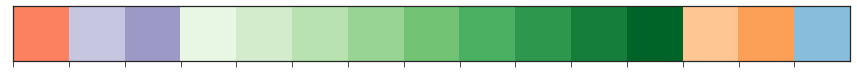

In [151]:
lipid_class_color_gradient = (
    list(sns.color_palette('Reds', 6)[2:3]) +
    list(sns.color_palette('Purples', 5)[1:3]) + 
    list(sns.color_palette('Greens', 9)) +
    list(sns.color_palette('Oranges', 6)[1:3]) +
    list(sns.color_palette('Blues', 6)[2:3])
)
sns.palplot(lipid_class_color_gradient)

Text(0, 0, '82 Polar\nMetabolites')

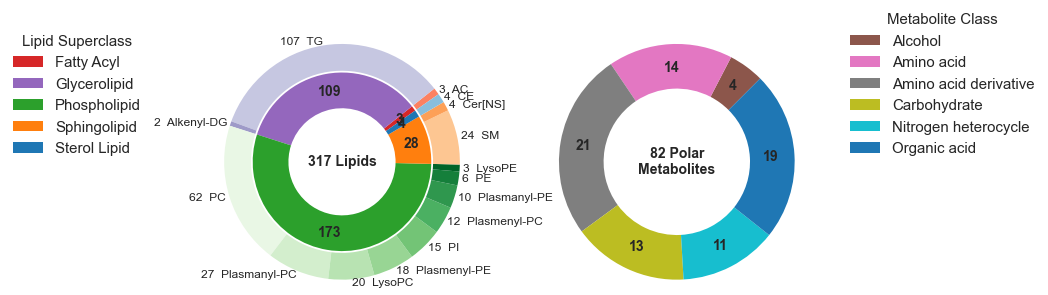

In [297]:
fig, axs = plt.subplots(ncols=2, figsize=(10,5), gridspec_kw={'wspace': 0.5})
axs[0].set_aspect('equal'), axs[1].set_aspect('equal')
ax = axs[0]
wedges, texts = ax.pie(
    lsc,
#     explode=[0.02]*5,  # expand the slices away from the center
    labels=lsc.index, #lsc.astype('str') + ' ' + lsc.index.astype('str'), 
    labeldistance=0.80,
    colors=lsc.index.map(colors),
    radius=1,
    wedgeprops=dict(width=0.4),
    textprops=dict(fontsize=14, fontweight='bold', ha='center'),
    rotatelabels=False,
    startangle=35,
)
[text.set_text(count) for text, count in zip(texts, lsc)]

ax.legend(loc=(-1, 0.5), fontsize=15, title='Lipid Superclass', title_fontsize=15)
outer_wedges, outer_texts = ax.pie(
    lc,
    labels=lc.astype('str') + '  ' + lc.index.astype('str'),
    labeldistance=1.03, 
#     explode=[0.05] * len(lc),
    radius=1.32,
    wedgeprops=dict(width=0.3),
#     colors=['gray', 'lightgray'],
    colors=lipid_class_color_gradient,
    textprops=dict(fontsize=12),
    startangle=35,
)
ax.text(0, 0, f'{lsc.sum()} Lipids', fontsize=14, fontweight='semibold', ha='center', va='center')

ax = axs[1]
m_wedges, m_texts = ax.pie(
    mc,
    labels=mc.index.astype('str').str.capitalize(),
    labeldistance=0.80,
    radius=1.32,
    colors=sns.color_palette('tab10', 11)[5:],   # sns.color_palette('muted', len(mc), desat=0.8),
    wedgeprops=dict(width=0.5),
    textprops=dict(fontsize=14, fontweight='bold', ha='center', ),
    startangle=45,
)
[text.set_text(count) for text, count in zip(m_texts, mc)]
ax.legend(loc=(1.25, 0.5), fontsize=15, title='Metabolite Class', title_fontsize=15)
ax.text(0, 0, f'{mc.sum()} Polar\nMetabolites', fontsize=14, fontweight='semibold', ha='center', va='center')


Text(0, 0, '82 Polar\nMetabolites')

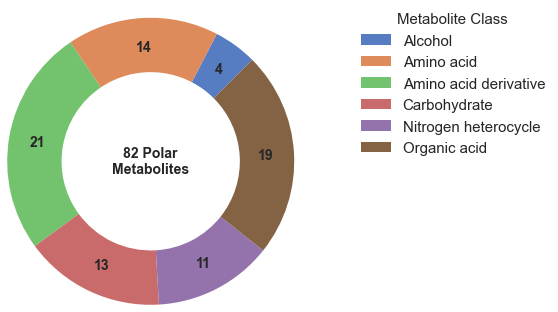

In [284]:
fig, ax = plt.subplots(figsize=(5,5))
ax.set_aspect('equal')
m_wedges, m_texts = ax.pie(
    mc,
    labels=mc.index.astype('str').str.capitalize(),
    labeldistance=0.80,
    radius=1.32,
    colors=sns.color_palette('muted', len(mc), desat=0.8),
    wedgeprops=dict(width=0.5),
    textprops=dict(fontsize=14, fontweight='bold', ha='center', ),
    startangle=45,
)
[text.set_text(count) for text, count in zip(m_texts, mc)]
plt.legend(loc=(1.25, 0.5), fontsize=15, title='Metabolite Class', title_fontsize=15)
ax.text(0, 0, f'{mc.sum()} Polar\nMetabolites', fontsize=14, fontweight='semibold', ha='center', va='center')

[(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)]